In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

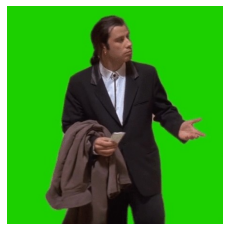

In [8]:
f_image = cv2.imread('/home/parth/work/UCSD/Fall 2021/ECE 253 Image Processing/Assignment 1/travolta.jpg')
f_image = cv2.cvtColor(f_image, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(f_image)
plt.show()

Convert image to HSV color space

In [9]:
f_image_hsv = cv2.cvtColor(f_image, cv2.COLOR_RGB2HSV)

Plot histogram of Hue channel

In [10]:
def compute_norm_rgb_histogram(I, binSize = 32):
    hist_red = np.zeros((1,binSize))
    hist_green = np.zeros((1,binSize))
    hist_blue = np.zeros((1,binSize))
    k = 256/binSize
    I = I/k
    I = I.astype(int)
    I = I.reshape((I.shape[0]*I.shape[1], 3))
    for i in range(I.shape[0]):
        hist_red[0,I[i,0]] = hist_red[0,I[i,0]] + 1
        hist_green[0,I[i,1]] = hist_green[0,I[i,1]] + 1
        hist_blue[0,I[i,2]] = hist_blue[0,I[i,2]] + 1
    # Normalize values
    hist_red = hist_red/np.sum(hist_red)
    hist_green = hist_green/np.sum(hist_green)
    hist_blue = hist_blue/np.sum(hist_blue)
    return np.hstack((hist_red, hist_green, hist_blue)).ravel()

binSize = 32;
hist = compute_norm_rgb_histogram(f_image_hsv, binSize)

4)\
(i)Mask with forground and background segmented.

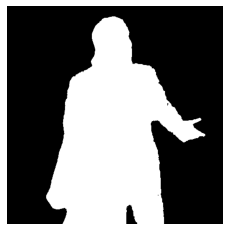

In [11]:
mask_fg = np.ones_like(f_image)*255
mask_fg[np.logical_and(f_image_hsv[:,:,0]>45, f_image_hsv[:,:,0]<80)] = 0
plt.imshow(mask_fg, cmap='Greys')
plt.axis('off')
plt.show()

Extract forreground object using mask

In [12]:
f_image_extracted = f_image
f_image_extracted[mask_fg == 0] = 0 

Extract mask for background

In [13]:
mask_bg = np.ones_like(mask_fg)*255 - mask_fg

In [14]:
b_image = cv2.imread('/home/parth/work/UCSD/Fall 2021/ECE 253 Image Processing/Assignment 1/geisel.jpg')
b_image = cv2.cvtColor(b_image, cv2.COLOR_BGR2RGB)

4)\
(ii) Background pixels set to 0 and foreground pixels set to original image pixel values.
Need to enlarge mask and extracted foregrund if the 2 image size don't match

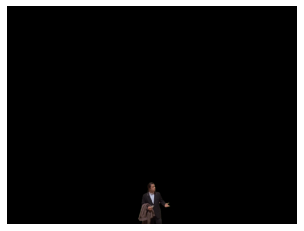

In [21]:
# t b l r
if (b_image.shape != mask_bg.shape):
    t = b_image.shape[0] - mask_bg.shape[0];
    b = 0
    l = int((b_image.shape[1] - mask_bg.shape[1])/2)
    r = b_image.shape[1] - mask_bg.shape[1] - l
    b_mask_enlarged = cv2.copyMakeBorder(mask_bg,t,b,l,r, cv2.BORDER_CONSTANT, value = [255,255,255])
    
    f_image_extracted_enlarged = cv2.copyMakeBorder(f_image_extracted,t,b,l,r, cv2.BORDER_CONSTANT, value = [0,0,0])
    plt.axis('off')
    plt.imshow(f_image_extracted_enlarged, cmap='Greys')
    plt.show()

Extract background image using mask calculcated

In [22]:
b_image_extracted = b_image
b_image_extracted[b_mask_enlarged == 0] = 0 

4)\
(iii)
Image with foreground object segmented overlayed on a background image

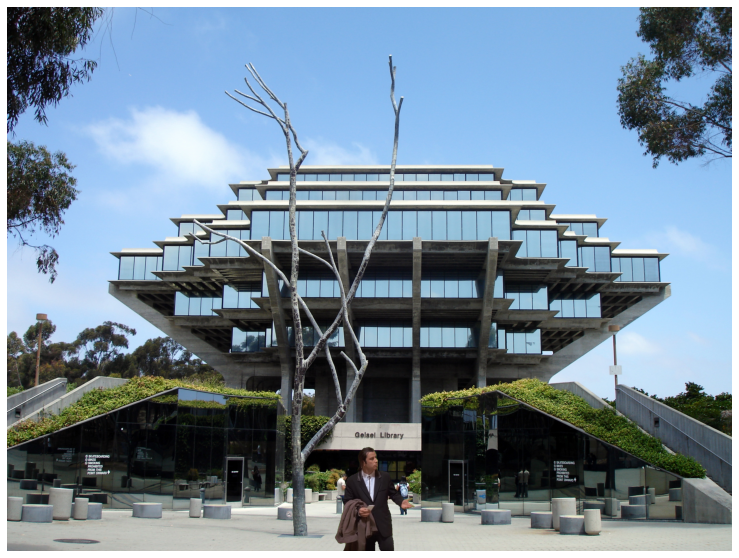

In [24]:
final_image = b_image_extracted + f_image_extracted_enlarged
plt.figure(figsize = (25,10))
plt.imshow(final_image)
plt.axis('off')
plt.show()